<a href="https://colab.research.google.com/github/remijul/tutorial/blob/master/Supervised_ML_Classification_of_Penguins.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised ML - Classification of Penguins


---
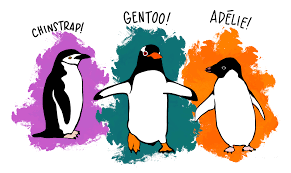



## Objectifs
Pour toute les étapes ci-dessous il vous est demandé d'**argumenter vos choix** et d'**expliquer les résultats** obtenus.

* Réaliser une EDA (Exploratory Data Analysis) sur le jeu de données
  - Descrire les données
  - Réaliser une analyse univariée et bivariée

* Réaliser le preprocessing des données
  - Gérer les données manquantes
  - Procéder à la normalisation / encodage

* Entrainer un modèle de classification
  - Choisir un modèle répondant aux objectifs du projet
  - Définir les paramètres du modèle
  - Utiliser la validation croisée

* Evaluer le modèle
  - Choisir la ou les métriques d'erreur
  - Valider les performances obtenues

* Conclure
  - Réalisation du projet
  - Difficultés
  - Performance
  - ...


## Bonus
Pour ceux qui veulent aller plus loin, vous pouvez notamment :

* Utiliser un Pipeline
* Procéder à une recherche exhaustive des hyper-paramètres (grid search)
* Procéder à une comparaison de modèles
* Réaliser une prédiction sur des nouvelles données
* Restituer des graphiques pour améliorer la compréhension du projet
* Laisser parler votre intuition ...

## 1.Le jeu de données
Le jeu de données est disponible ci-dessous.  
Il concerne le recensement d'animaux marins (dauphins) selon différentes caractéristiques :
* la cible à prédire est la colonne `variety`
* les features (numériques et catégorielles) sont toutes les autres colonnes :
  - `island` : zone géographique où l'animal réside
  - `culmen_length_mm` : dimension n°1 de l'animal
  - `culmen_depth_mm` : dimension n°2 de l'animal
  - `flipper_length_mm` : dimension n°3 de l'animal
  - `body_mass_g` : masse de l'animal
  - `sex` : genre de l'animal

In [1]:
import pandas as pd
url = "https://raw.githubusercontent.com/remijul/dataset/master/penguins_size.csv"
df = pd.read_csv(url)
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


## 2.Les librairies

In [ ]:
# Import et traitement des données
import pandas as pd
import numpy as np

# Graphiques
import seaborn as sns ; sns.set()
import matplotlib.pyplot as plt

# Machine learning - Preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, RobustScaler #MinMaxScaler, 
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.compose import ColumnTransformer

# Machine learning - Automatisation
from sklearn.pipeline import Pipeline
from sklearn import set_config

# Machine learning - Modèle d'apprentissage supervisé
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.decomposition import PCA

# Machine learning - Modèle selection
from sklearn.model_selection import train_test_split, GridSearchCV

# Machine learning - Métriques d'erreur
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score, ConfusionMatrixDisplay, f1_score, fbeta_score

## 3.Analyse de données exploratoire (EDA)

### 3.1 Description du dataset

Dimensions du jeu de données.

In [ ]:
df.shape

(344, 7)

Nom et type de données dans les colonnes du jeu de données.

In [ ]:
df.dtypes

species               object
island                object
culmen_length_mm     float64
culmen_depth_mm      float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

Informations sur le dataset.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


Est-ce que le jeu de données contient des données manquantes ?  
Si oui, combien ?

In [ ]:
df.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

Affichage des 10 premières lignes du jeu de données.


In [ ]:
df.head(n=10)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,FEMALE
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,MALE
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


Affichage des 10 dernières lignes du jeu de données.


In [ ]:
df.tail(n=10)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
334,Gentoo,Biscoe,46.2,14.1,217.0,4375.0,FEMALE
335,Gentoo,Biscoe,55.1,16.0,230.0,5850.0,MALE
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.
337,Gentoo,Biscoe,48.8,16.2,222.0,6000.0,MALE
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE
343,Gentoo,Biscoe,49.9,16.1,213.0,5400.0,MALE


### 3.2 Analyse univariée 
Description statistique des données.

In [ ]:
df.describe(include='all')


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
count,344,344,342.000000,342.000000,342.000000,342.000000,334
unique,3,3,NaN,NaN,NaN,NaN,3
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,MALE
freq,152,168,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN
std,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN


### 3.3 Analyse bivariée - Variables numériques

Distribution de la variable `variety` en fonction des 4 variables numériques.

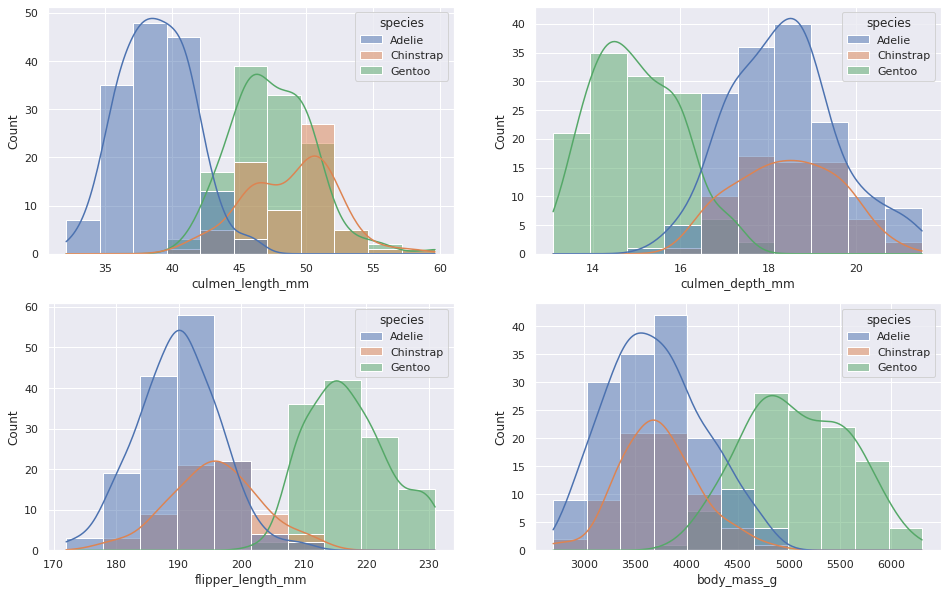

In [ ]:
fig, axs = plt.subplots(figsize=(16, 10))

# Plot variable 1
ax1 = plt.subplot(2,2,1)
sns.histplot(data=df, x="culmen_length_mm", hue="species", kde=True)

# Plot variable 2
ax1 = plt.subplot(2,2,2)
sns.histplot(data=df, x="culmen_depth_mm", hue="species", kde=True)

# Plot variable 3
ax1 = plt.subplot(2,2,3)
sns.histplot(data=df, x="flipper_length_mm", hue="species", kde=True)

# Plot variable 4
ax1 = plt.subplot(2,2,4)
sns.histplot(data=df, x="body_mass_g", hue="species", kde=True)

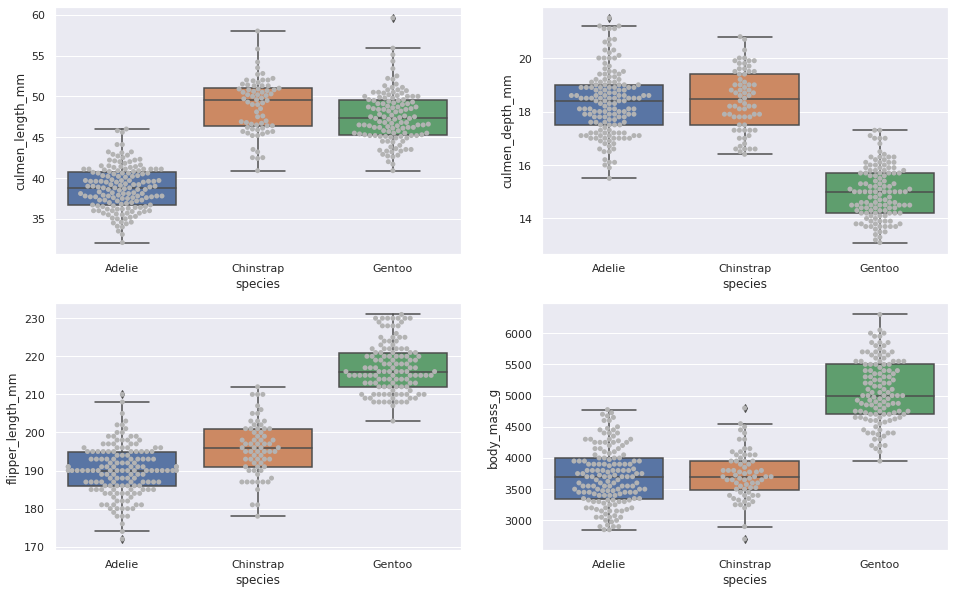

In [ ]:
fig, axs = plt.subplots(figsize=(16, 10))

# Plot variable 1
ax1 = plt.subplot(2,2,1)
sns.boxplot(data=df, y="culmen_length_mm", x="species")
sns.swarmplot(data=df, y="culmen_length_mm", x="species", color=".7")

# Plot variable 2
ax1 = plt.subplot(2,2,2)
sns.boxplot(data=df, y="culmen_depth_mm", x="species")
sns.swarmplot(data=df, y="culmen_depth_mm", x="species", color=".7")

# Plot variable 3
ax1 = plt.subplot(2,2,3)
sns.boxplot(data=df, y="flipper_length_mm", x="species")
sns.swarmplot(data=df, y="flipper_length_mm", x="species", color=".7")

# Plot variable 4
ax1 = plt.subplot(2,2,4)
sns.boxplot(data=df, y="body_mass_g", x="species")
sns.swarmplot(data=df, y="body_mass_g", x="species", color=".7")

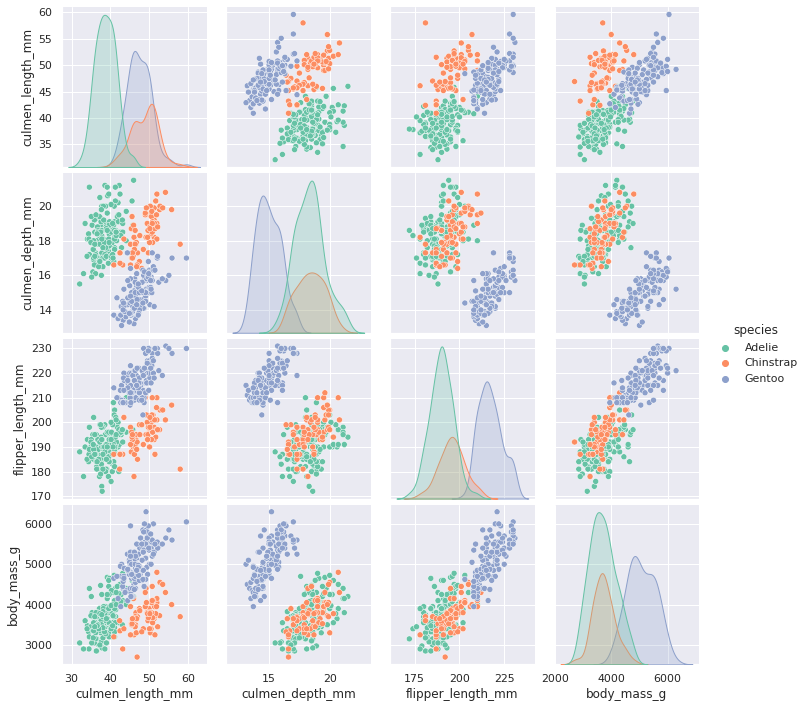

In [ ]:
sns.pairplot(data=df, palette="Set2", diag_kind='kde', hue='species')

### 3.4 Analyse bivariée - Variables catégorielles

In [ ]:
df.groupby('species').count()[['island', 'sex']]

,island,sex
species,,
Adelie,152,146
Chinstrap,68,68
Gentoo,124,120


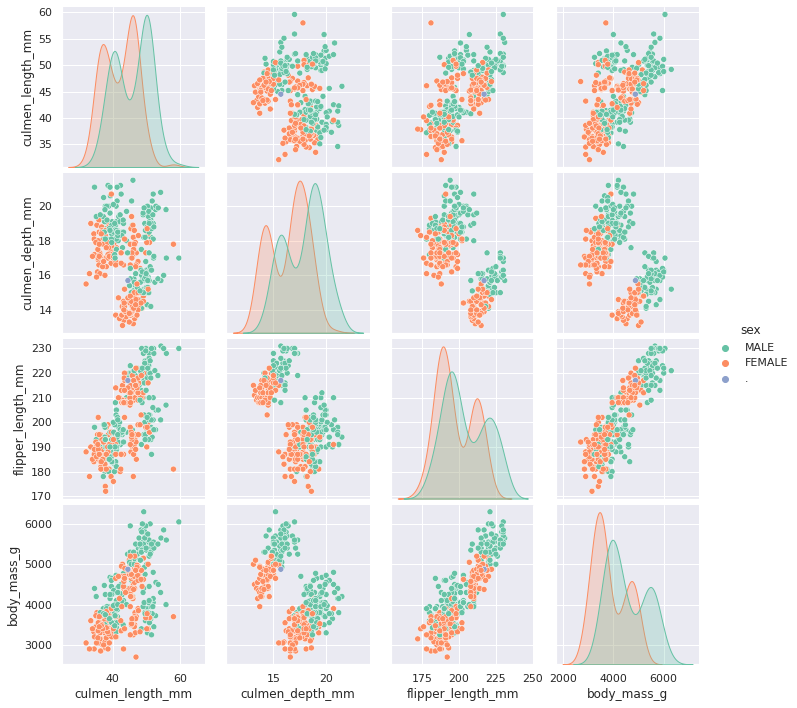

In [ ]:
sns.pairplot(data=df, palette="Set2", diag_kind='kde', hue='sex')

### 3.5 Data correlation

In [ ]:
df.corr()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,1.000000,-0.235053,0.656181,0.595110
culmen_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


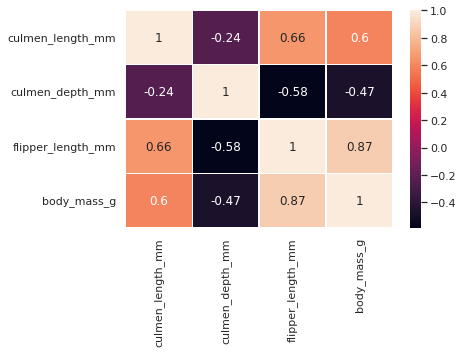

In [ ]:
sns.heatmap(df.corr(), annot=True, linewidths=0.5)

## 4.Preprocessing

### 4.1 Preprocessing sur la cible

Sélection de la variable cible (target) `variety`.

In [ ]:
y = df['species']

Preprocessing sur la variable cible (target) `variety`.

In [ ]:
lb_encod = LabelEncoder()
y = lb_encod.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

### 4.2 Preprocessing sur les features

Features preprocessing

In [ ]:
X = df.drop(columns='species')
X.head()

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


#### 4.2.1 Variables catégorielles

Selection des variables categorielles.

In [ ]:
column_cat = X.select_dtypes(include=['object']).columns
column_cat

Index(['island', 'sex'], dtype='object')

Déclaration de la méthode de preprocessing sur les variables catégorielles.

In [ ]:
transfo_cat = Pipeline(steps=[
    ('imputation', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse = False))
])

#### 4.2.2 Variables numériques

Selection des variables numériques.

In [ ]:
column_num = X.select_dtypes(exclude=['object']).columns
column_num

Index(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g'],
      dtype='object')

Déclaration de la méthode de preprocessing sur les variables numériques.

In [ ]:
transfo_num = Pipeline(steps=[
    ('imputation', KNNImputer(n_neighbors=3, weights="uniform")),
    ('scaling', RobustScaler())
])

#### 4.2.3 Transformation des features

In [ ]:
preparation = ColumnTransformer(
    transformers=[
        ('data_cat', transfo_cat , column_cat),
        ('data_num', transfo_num , column_num)
    ])

In [ ]:
preparation

ColumnTransformer(transformers=[('data_cat',
                                 Pipeline(steps=[('imputation',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 Index(['island', 'sex'], dtype='object')),
                                ('data_num',
                                 Pipeline(steps=[('imputation',
                                                  KNNImputer(n_neighbors=3)),
                                                 ('scaling', RobustScaler())]),
                                 Index(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g'],
      dtype='object'))])

In [ ]:
set_config(display="diagram")
preparation

ColumnTransformer(transformers=[('data_cat',
                                 Pipeline(steps=[('imputation',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 Index(['island', 'sex'], dtype='object')),
                                ('data_num',
                                 Pipeline(steps=[('imputation',
                                                  KNNImputer(n_neighbors=3)),
                                                 ('scaling', RobustScaler())]),
                                 Index(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g'],
      dtype='object'))])

### 4.3 Répartition `train-test-split` 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=2, stratify=y)

## 5.Entrainement du modèle


### 5.1 Premier essai : `SVC`

#### 5.1.1 Déclaration du modèle
Déclaration du modèle sans paramétrage.
Documentation [SVC()](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html).

In [ ]:
clf = SVC()

#### 5.1.2 Intégration dans le pipeline
Intégration du modèle d'apprentissage dans le pipeline.

In [ ]:
model = Pipeline(steps=[('preparation', preparation),
                        ('model', clf)])
model

Pipeline(steps=[('preparation',
                 ColumnTransformer(transformers=[('data_cat',
                                                  Pipeline(steps=[('imputation',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  Index(['island', 'sex'], dtype='object')),
                                                 ('data_num',
                                                  Pipeline(steps=[('imputation',
                                                                   KNNImputer(n_neighbors=3)),
                                                                  ('scaling',
                                                                   RobustScaler())]),
                                                  Index(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g'],
      dtype='object'))])),
                ('model', SVC())])

#### 5.1.3 Apprentissage
Phase d'apprentissage du modèle.

In [ ]:
model.fit(X_train, y_train)

Pipeline(steps=[('preparation',
                 ColumnTransformer(transformers=[('data_cat',
                                                  Pipeline(steps=[('imputation',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  Index(['island', 'sex'], dtype='object')),
                                                 ('data_num',
                                                  Pipeline(steps=[('imputation',
                                                                   KNNImputer(n_neighbors=3)),
                                                                  ('scaling',
                                                                   RobustScaler())]),
                                                  Index(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g'],
      dtype='object'))])),
                ('model', SVC())])

#### 5.1.4 Prédictions
Utiliser du jeu de test pour réaliser les prédictions.

In [ ]:
y_pred = model.predict(X_test)

#### 5.1.5 Evaluation
Evaluation de la performance (`accuracy score`) du modèle.

In [ ]:
score = accuracy_score(y_test, y_pred)
print("Performance du modèle SVC - Accuracy score :", round(score, 5))

Performance du modèle SVC - Accuracy score : 1.0


Matrice de confusion

In [ ]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
conf_matrix

array([[76,  0,  0],
       [ 0, 34,  0],
       [ 0,  0, 62]])

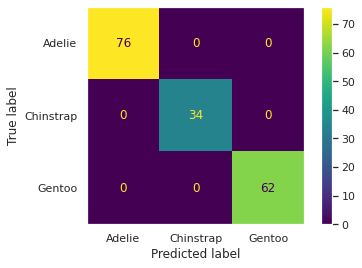

In [ ]:
sns.set_style("dark")

cm_plot = ConfusionMatrixDisplay(conf_matrix,
                                display_labels=df['species'].unique())

cm_plot.plot()

## 6.Comparaison de modèles

### 6.1 Construction d'une fonction `getClassifResults()`
Pour faciliter le processus complet d'entrainement et d'évaluation du modèle, nous allons créer ici une fonction qui fait l'intégralité du processus d'apprentissage supervisé et qui restitue les performances du modèle.  

La fonction `getClassifResults()` prend comme paramètres d'entrée :  
* `classifier` : le modèle de classification que nous souhaitons utiliser.
* `parameters` : la liste des hyper-paramètres et de leurs valeurs qui souhaitons étudier dans le processus `GridSearchCV`, au format dictionnaire.
* `data` : la dataframe sur laquelle nous souhaitons réaliser le processus d'apprentissage supervisé.

In [ ]:
def getClassifResults(classifier, parameters, data):

  # PREPROCESSING
  # Target
  y = LabelEncoder().fit_transform(data['species'])

  # Features preprocessing
  X = data.drop(columns='species')
  transfo_cat = Pipeline(steps=[
      ('imputation', SimpleImputer(strategy='most_frequent')),
      ('onehot', OneHotEncoder(handle_unknown='ignore', sparse = False))
  ])

  transfo_num = Pipeline(steps=[
      ('imputation', KNNImputer(n_neighbors=3, weights="uniform")),
      ('scaling', RobustScaler())
  ])

  preparation = ColumnTransformer(
      transformers=[
          ('data_cat', transfo_cat , X.select_dtypes(include=['object']).columns),
          ('data_num', transfo_num , X.select_dtypes(exclude=['object']).columns)
      ])

  # train-test-split	
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2, stratify=y)	

  # Pipeline and Model
  model = Pipeline(steps=[('preparation', preparation),
                          ('model', classifier)])

  # Gridsearch
  grid = GridSearchCV(estimator = model, param_grid = parameters, scoring = 'f1_weighted', cv = 5, n_jobs =-1, verbose = 0)
  #grid = GridSearchCV(estimator = model, param_grid = parameters, scoring = 'f1_weighted', cv = 5, n_jobs =-1, verbose = 0)

  # Fit
  grid.fit(X_train, y_train)

  # Predict
  y_pred = grid.predict(X_test)
  test_score = fbeta_score(y_test, y_pred, average='weighted', beta=0.5)

  # Results
  classifier_results = []
  classifier_results.append(grid.cv_results_['mean_fit_time'].mean().round(4))
  classifier_results.append(grid.best_score_.round(4))
  classifier_results.append(test_score.round(4))
  classifier_results.append(grid.best_params_)

  return(classifier_results)

### 6.2 Decision Tree Classifier
Nous allons utiliser ici le Decision Tree Classifier associé à sa grille de paramètres spécfiques.

In [ ]:
classifier = DecisionTreeClassifier()
parameters = {
    'model__criterion' : ('gini', 'entropy'),
    'model__max_depth' : [3, 5, 10],
    'model__min_samples_split' : [2, 5, 10],
    'model__min_samples_leaf' : range(1, 21, 2)
}

res_DT = getClassifResults(classifier, parameters, data=df)
print(res_DT)

[0.0284, 0.9618, 0.9731, {'model__criterion': 'entropy', 'model__max_depth': 5, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2}]


### 6.3 C-Support Vector Classification
Nous allons utiliser ici le Support Vector Classifier associé à sa grille de paramètres spécfiques.

In [ ]:
classifier = SVC()
parameters = {
    'model__kernel':('linear', 'rbf'),
    'model__C':[1, 10]
}

res_SVC = getClassifResults(classifier, parameters, data=df)
print(res_SVC)

[0.0286, 0.9889, 1.0, {'model__C': 1, 'model__kernel': 'linear'}]


### 6.4 KNeighborsClassifier
Nous allons utiliser ici le KNeighborsClassifier associé à sa grille de paramètres spécfiques.

In [ ]:
classifier = KNeighborsClassifier()
parameters = {
    'model__n_neighbors' : range(1, 10, 2)
}

res_KNN = getClassifResults(classifier, parameters, data=df)
print(res_KNN)

[0.0404, 0.9963, 0.9861, {'model__n_neighbors': 9}]


### 6.5 Random Forest Classifier
Nous allons utiliser ici le Random Forest Classifier associé à sa grille de paramètres spécfiques.

In [ ]:
classifier = RandomForestClassifier()
parameters = {
    'model__n_estimators' : range(50, 500, 50)#,
    #'model__criterion' : ('gini', 'entropy'),
    #'model__max_depth' : range(3, 11, 2),
    #'model__min_samples_split' : range(3, 11, 2),
    #'model__min_samples_leaf' : range(1, 21, 2)
}

res_RF = getClassifResults(classifier, parameters, data=df)
print(res_RF)

[0.6189, 0.9728, 0.9861, {'model__n_estimators': 50}]


### 6.6 Gradient Boosting Classifier
Nous allons utiliser ici le Gradient Boosting Classifier associé à sa grille de paramètres spécfiques.

In [ ]:
classifier = GradientBoostingClassifier()
parameters = {
    'model__learning_rate' : np.arange (start=0.1, stop=0.9, step=0.1)#,
    #'model__n_estimators' : range(50, 500, 50),
    #'model__criterion' : ('gini', 'entropy'),
    #'model__max_depth' : range(3, 11, 2),
    #'model__min_samples_split' : range(3, 11, 2),
    #'model__min_samples_leaf' : range(1, 21, 2)
}

res_GB = getClassifResults(classifier, parameters, data=df)
print(res_GB)

[0.3975, 0.969, 0.9861, {'model__learning_rate': 0.30000000000000004}]


### 6.7 Synthèse
Nous allons conserver et afficher tous les résulats dans une dataframe.

In [ ]:
results_df = pd.DataFrame(res_DT,
                          index=['Testing time (sec)', 'Training score (F1-score)', 'Evaluation score (F1-score)', 'Best parameters'],
                          columns=['Decision tree'])

In [ ]:
results_df

,Decision tree
Testing time (sec),0.0284
Training score (F1-score),0.9618
Evaluation score (F1-score),0.9731
Best parameters,"{'model__criterion': 'entropy', 'model__max_de..."


In [ ]:
results_df['Support Vector Classif'] = res_SVC
results_df['KNN Classif'] = res_KNN
results_df['Random Forest Classif'] = res_RF
results_df['Gradient Boosting Classif'] = res_GB

In [ ]:
results_df

,Decision tree,Support Vector Classif,KNN Classif,Random Forest Classif,Gradient Boosting Classif
Testing time (sec),0.0284,0.0286,0.0404,0.6189,0.3975
Training score (F1-score),0.9618,0.9889,0.9963,0.9728,0.969
Evaluation score (F1-score),0.9731,1.0,0.9861,0.9861,0.9861
Best parameters,"{'model__criterion': 'entropy', 'model__max_de...","{'model__C': 1, 'model__kernel': 'linear'}",{'model__n_neighbors': 9},{'model__n_estimators': 50},{'model__learning_rate': 0.30000000000000004}


## 7.Sélection de features
A ce stade il parait intéressant de s'attarder sur les features et d'évaluer leur contribution (`importance`) dans la construction du modèle.  
Reprenons dans cet exemple un des modèles utilisés prcédemment :
* le classifier `DecisionTreeClassifier()`
* associé à ces hyper-paramètres (`best.parmas_`) : `[criterion='gini', max_depth=10, min_samples_leaf=1, min_samples_split=5]`


### 7.1 Modèle d'appentissage

In [ ]:
# PREPROCESSING
# Target
y = LabelEncoder().fit_transform(df['species'])

# Features preprocessing
X = df.drop(columns='species')
transfo_cat = Pipeline(steps=[
      ('imputation', SimpleImputer(strategy='most_frequent')),
      ('onehot', OneHotEncoder(handle_unknown='ignore', sparse = False))
])

transfo_num = Pipeline(steps=[
      ('imputation', KNNImputer(n_neighbors=3, weights="uniform")),
      ('scaling', RobustScaler())
])

preparation = ColumnTransformer(
      transformers=[
          ('data_cat', transfo_cat , X.select_dtypes(include=['object']).columns),
          ('data_num', transfo_num , X.select_dtypes(exclude=['object']).columns)
])

# train-test-split	
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2, stratify=y)	

classifier = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_leaf=1, min_samples_split=5)

# Pipeline and Model
pipe = Pipeline(steps=[('preparation', preparation),
                          ('model', classifier)])

# Fit
pipe.fit(X_train, y_train)

Pipeline(steps=[('preparation',
                 ColumnTransformer(transformers=[('data_cat',
                                                  Pipeline(steps=[('imputation',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  Index(['island', 'sex'], dtype='object')),
                                                 ('data_num',
                                                  Pipeline(steps=[('imputation',
                                                                   KNNImputer(n_neighbors=3)),
                                                                  ('scaling',
                                                                   RobustScaler())]),
                                                  Index(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g'],
      dtype='object'))])),
                ('model',
                 DecisionTreeClassifier(max_depth=10, min_samples_split=5))])

La difficulté à ce stade réside dans le fait d'extraire :
* les features résultantes du preprocessing et utilisées par le modèle.
* les résultats de `feature_importances_`.  

Ces 2 paramètres sont disponibles dans l'objet `pipe`.

### 7.2 Extractions des features

Les features catégorielles sont accessibles ainsi.

In [ ]:
categorical_features = X.select_dtypes(include=['object']).columns
categorical_features

Index(['island', 'sex'], dtype='object')

Les features après `one_hot_encoder` sont accessibles ainsi.

In [ ]:
onehot_features = list(pipe.named_steps['preparation'].named_transformers_['data_cat'].named_steps['onehot'].get_feature_names(input_features=categorical_features))
onehot_features

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['island_Biscoe',
 'island_Dream',
 'island_Torgersen',
 'sex_.',
 'sex_FEMALE',
 'sex_MALE']

Les features numériques sont accessibles ainsi.

In [ ]:
numerical_features = X.select_dtypes(exclude=['object']).columns
numerical_features

Index(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g'],
      dtype='object')

L'ensemble des features utilisées sont alors celles-ci.

In [ ]:
all_features = list(onehot_features) + list(numerical_features)
print(all_features)

['island_Biscoe', 'island_Dream', 'island_Torgersen', 'sex_.', 'sex_FEMALE', 'sex_MALE', 'culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']


### 7.3 Extraction de la contribution des features
Ces données sont également disponibles via le pipeline.

In [ ]:
importance = pipe.named_steps['model'].feature_importances_
importance

array([0.        , 0.04805844, 0.        , 0.        , 0.        ,
       0.00776099, 0.3328291 , 0.07581352, 0.53553795, 0.        ])

### 7.4 Représentation graphique

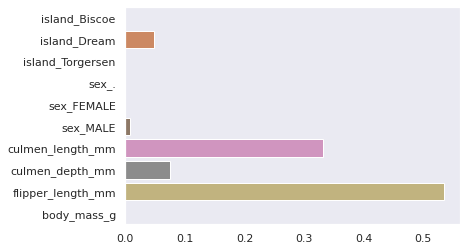

In [ ]:
sns.barplot(y=all_features, x=importance)

Une prochaine étape serait maintenant d'utiliser uniquement les 2 variables les plus contributives et d'évaluer les performances du modèles avec ce nouveau dataset simplifié ... 

## 8.Visualisation des données
Cherchons à représenter maintenant les différents sujets étudiés dans le dataset.  
Pour cela nous allons réprésenter les données sur un plan 2-D et réaliser au préalable une réduction de dimensions grâce à l'ACP.

In [ ]:
df_reduced = PCA(n_components=2).fit_transform(X.dropna().select_dtypes(exclude=['object']))
df_reduced

array([[-4.59325613e+02,  1.33614338e+01],
       [-4.09252666e+02,  9.18763837e+00],
       [-9.59044842e+02, -8.16458018e+00],
       [-7.59116033e+02, -1.87287871e+00],
       [-5.59177659e+02,  3.39321457e+00],
       [-5.84309825e+02,  1.13799268e+01],
       [ 4.65771676e+02,  1.47449893e+01],
       [-1.00923273e+03,  3.03260724e+00],
       [-4.09184594e+02,  5.08382748e+00],
       [ 1.90831399e+02,  9.17781921e+00],
       [-5.09267494e+02,  9.51440261e+00],
       [-7.59077268e+02, -4.42248491e+00],
       [ 2.90835784e+02,  9.15073806e+00],
       [-8.84245552e+02,  5.30934065e+00],
       [-9.15947930e+00,  6.22042449e+00],
       [-8.09393303e+02,  1.48411895e+01],
       [-6.09327764e+02,  1.23901665e+01],
       [-4.09223497e+02,  7.65572173e+00],
       [-2.59292540e+02,  1.29656932e+01],
       [-4.09346509e+02,  1.50570073e+01],
       [-4.09255973e+02,  9.70836464e+00],
       [-6.59264202e+02,  7.84127649e+00],
       [-1.00915941e+03, -1.47100177e+00],
       [-1.

In [ ]:
pca = PCA(n_components=2).fit(X.dropna().select_dtypes(exclude=['object']))
print(pca.explained_variance_ratio_)

[9.99893266e-01 7.81736226e-05]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Animaux marins par espèces')

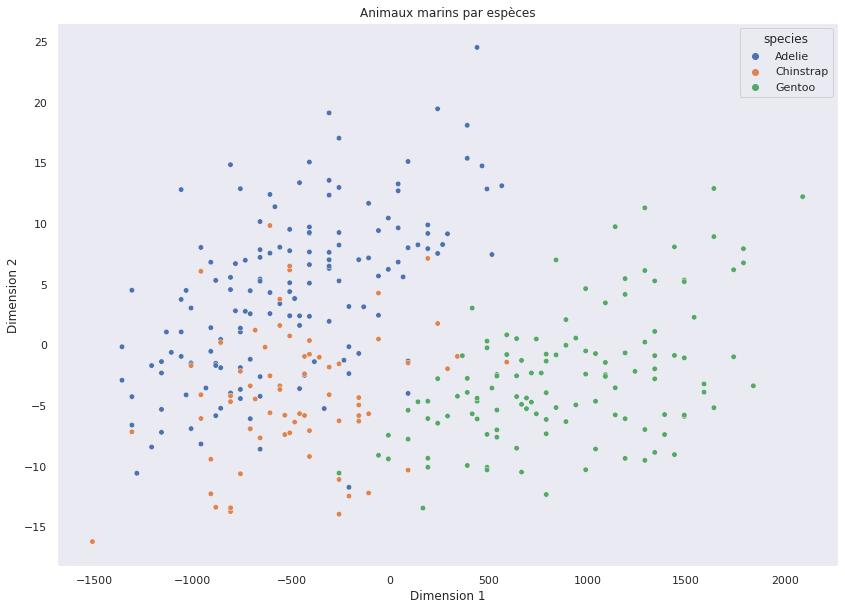

In [ ]:
plt.figure(figsize=(14, 10))
sns.scatterplot(df_reduced[:, 0], df_reduced[:, 1], hue = df.dropna()['species'], s=30)
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.title("Animaux marins par espèces")